<a href="https://colab.research.google.com/github/jasminenabilaayoedya/Person-Tracking/blob/main/Person_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fiftyone


In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
foz.list_zoo_datasets()

['activitynet-100',
 'activitynet-200',
 'bdd100k',
 'caltech101',
 'caltech256',
 'cifar10',
 'cifar100',
 'cityscapes',
 'coco-2014',
 'coco-2017',
 'fashion-mnist',
 'fiw',
 'hmdb51',
 'imagenet-2012',
 'imagenet-sample',
 'kinetics-400',
 'kinetics-600',
 'kinetics-700',
 'kinetics-700-2020',
 'kitti',
 'kitti-multiview',
 'lfw',
 'mnist',
 'open-images-v6',
 'open-images-v7',
 'places',
 'quickstart',
 'quickstart-3d',
 'quickstart-geo',
 'quickstart-groups',
 'quickstart-video',
 'sama-coco',
 'ucf101',
 'voc-2007',
 'voc-2012']

In [ ]:
datasets = foz.load_zoo_dataset('coco-2017', splits=('train', 'validation', 'test'), classes=['person'], progress=True, max_samples=1000)
datasets

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


50 images found; downloading the remaining 950


INFO:fiftyone.utils.coco:50 images found; downloading the remaining 950


 100% |██████████████████| 950/950 [10.0m elapsed, 0s remaining, 1.5 images/s]     


INFO:eta.core.utils: 100% |██████████████████| 950/950 [10.0m elapsed, 0s remaining, 1.5 images/s]     


Writing annotations for 1000 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 1000 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.zoo.datasets:Downloading split 'test' to '/root/fiftyone/coco-2017/test' if necessary


Test split is unlabeled; ignoring classes requirement


Found test info at '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


INFO:fiftyone.utils.coco:Found test info at '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


50 images found; downloading the remaining 950


INFO:fiftyone.utils.coco:50 images found; downloading the remaining 950


 100% |██████████████████| 950/950 [9.9m elapsed, 0s remaining, 1.5 images/s]       


INFO:eta.core.utils: 100% |██████████████████| 950/950 [9.9m elapsed, 0s remaining, 1.5 images/s]       


Writing annotations for 1000 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 1000 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


You are running the oldest supported major version of MongoDB. Please refer to https://deprecation.voxel51.com for deprecation notices. You can suppress this exception by setting your `database_validation` config parameter to `False`. See https://docs.voxel51.com/user_guide/config.html#configuring-a-mongodb-connection for more information


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |█████████████████| 947/947 [7.8s elapsed, 0s remaining, 89.9 samples/s]       


INFO:eta.core.utils: 100% |█████████████████| 947/947 [7.8s elapsed, 0s remaining, 89.9 samples/s]       


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 1000/1000 [7.5s elapsed, 0s remaining, 140.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [7.5s elapsed, 0s remaining, 140.1 samples/s]      


Loading 'coco-2017' split 'test'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'test'


Dataset is unlabeled; ignoring classes requirement


 100% |███████████████| 1000/1000 [358.2ms elapsed, 0s remaining, 2.8K samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [358.2ms elapsed, 0s remaining, 2.8K samples/s]      


Dataset 'coco-2017-train-validation-test-1000' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-validation-test-1000' created


Name:        coco-2017-train-validation-test-1000
Media type:  image
Num samples: 2947
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

# EDA

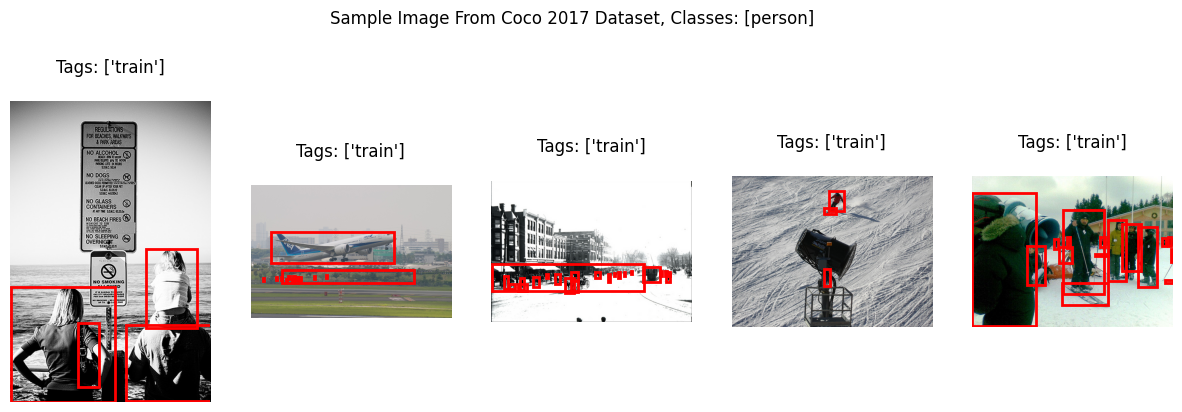

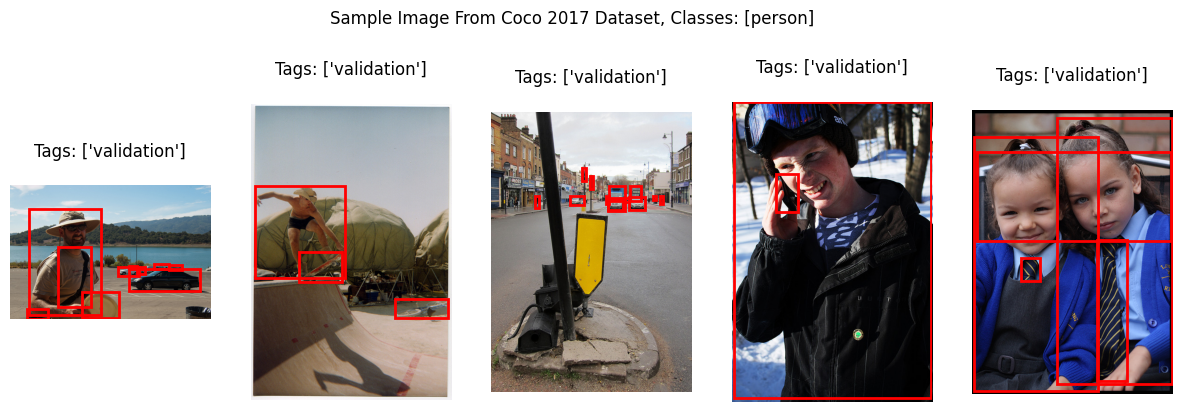

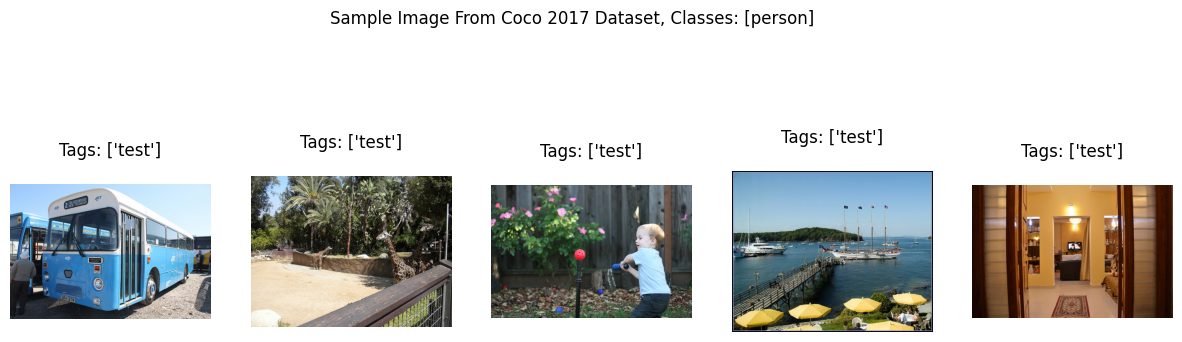

In [ ]:
def show_sample(split_view):
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle("Sample Image From Coco 2017 Dataset, Classes: [person]")
    i = 1
    for d in split_view.take(5):
        ax = fig.add_subplot(1, 5, i)
        ax.set_title(f"Tags: {d.tags}\n")
        img = plt.imread(d.filepath)
        ax.imshow(img)
        ax.axis('off')
        i += 1

        # Skip for testing data
        if d.ground_truth is None:
            continue

        for detection in d.ground_truth.detections:
            x, y, w, h = detection.bounding_box
            image_height, image_width, _ = img.shape
            x1 = x * image_width
            y1 = y * image_height
            x2 = x1 + (w * image_width)
            y2 = y1 + (h * image_height)
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

for split in ['train', 'validation', 'test']:
    split_view = datasets.match_tags(split)
    show_sample(split_view)

In [ ]:
for sample in datasets:
  if sample.ground_truth == None:
    continue

  detections = [detection for detection in sample.ground_truth.detections if detection.label == "person"]
  sample.ground_truth.detections = detections
  sample.save()

In [ ]:
# Export the splits
for split in ['train', 'validation', 'test']:
    split_view = datasets.match_tags(split)
    split_view.export(
        export_dir='./yolov5-coco-datasets',
        dataset_type=fo.types.YOLOv5Dataset,
        label_field='ground_truth',
        split=split,
        classes=['person'],
    )

Directory './yolov5-coco-datasets' already exists; export will be merged with existing files


 100% |█████████████████| 947/947 [3.7s elapsed, 0s remaining, 246.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 947/947 [3.7s elapsed, 0s remaining, 246.1 samples/s]      


Directory './yolov5-coco-datasets' already exists; export will be merged with existing files


 100% |███████████████| 1000/1000 [2.8s elapsed, 0s remaining, 426.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [2.8s elapsed, 0s remaining, 426.4 samples/s]      


Directory './yolov5-coco-datasets' already exists; export will be merged with existing files


 100% |███████████████| 1000/1000 [706.8ms elapsed, 0s remaining, 1.4K samples/s]       


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [706.8ms elapsed, 0s remaining, 1.4K samples/s]       


YOLOV8

In [ ]:
pip install ultralytics


In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2

import matplotlib.pyplot as plt

In [ ]:
model = YOLO('yolov8n.pt')
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
results = model.train(data='./yolov5-coco-datasets/dataset.yaml', epochs=10, imgsz=640, device=0, batch=32, plots=True, seed=18, project='./training/yolov8n')

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./yolov5-coco-datasets/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

In [ ]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7afb5a1a7230>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



0: 640x640 4 persons, 10.8ms
1: 640x640 16 persons, 10.8ms
2: 640x640 4 persons, 10.8ms
3: 640x640 7 persons, 10.8ms
Speed: 3.6ms preprocess, 10.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


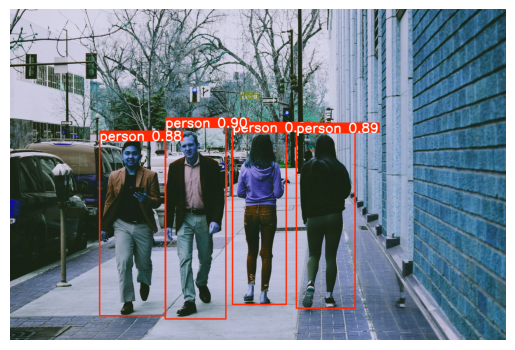

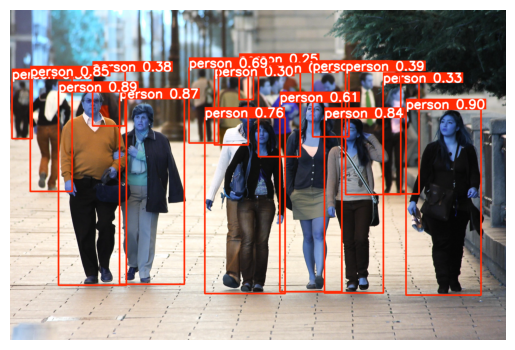

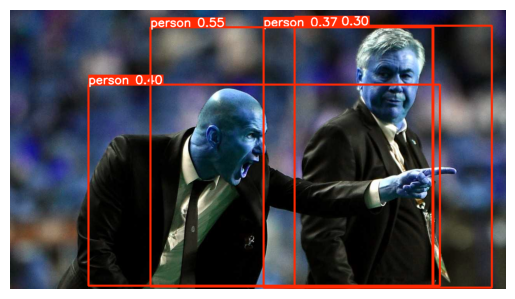

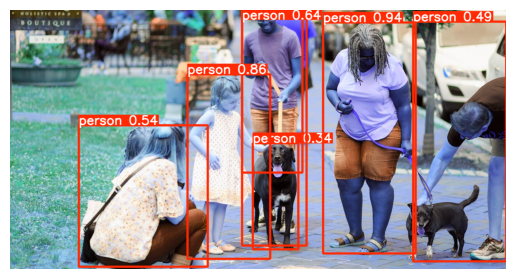

In [ ]:
import os

image_paths = [
    '/content/drive/MyDrive/colab/people.jpg',
    '/content/drive/MyDrive/colab/person.jpg',
    '/content/drive/MyDrive/colab/zidane.jpg',
    '/content/drive/MyDrive/colab/person2.jpeg',
]

predictions = model.predict(source=image_paths)

for p in predictions:
  %matplotlib inline
  plt.axis('off')
  plt.imshow(p.plot())
  plt.show()